In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from contrastive.backbones.pointnet import PointNetCls

In [2]:
data = np.load("/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE/mask/Rskeleton.npy")
data.shape

(1114, 17, 40, 38, 1)

In [3]:
np.product(data.shape)

28785760

In [4]:
points = np.nonzero(data)
for coord in points:
    print(len(coord))

points

870630
870630
870630
870630
870630


(array([   0,    0,    0, ..., 1113, 1113, 1113]),
 array([ 1,  1,  1, ..., 13, 13, 13]),
 array([ 7,  8,  9, ..., 11, 12, 12]),
 array([23, 23, 22, ..., 33, 29, 30]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [5]:
clouds = []

for i in range(data.shape[0]):
    point_cloud = data[i].nonzero()
    clouds.append(point_cloud)

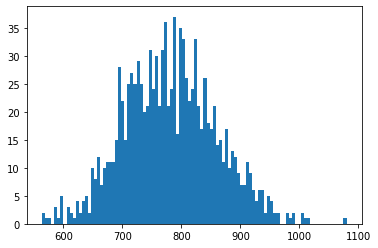

In [6]:
hist = []

for point_cloud in clouds:
    #print(len(point_cloud), len(point_cloud[0]))
    hist.append(len(point_cloud[0]))

plt.hist(hist, bins=100)
plt.show()

In [7]:
dats = data[0]

point_cloud = np.nonzero(dats)

point_cloud = np.matrix(point_cloud[:3])
print(point_cloud.shape)
#point_cloud = np.expand_dims(point_cloud, axis=0)
#print(point_cloud.shape)

(3, 912)


In [28]:
points = [point_cloud for i in range(10)]
points = np.array(points)

semi_points = [point_cloud[:,:500] for i in range(10)]
semi_points = np.array(semi_points)

points.shape, semi_points.shape

((10, 3, 912), (10, 3, 500))

In [29]:
X = torch.from_numpy(points).type(torch.FloatTensor)
semi_X = torch.from_numpy(semi_points).type(torch.FloatTensor)
X, semi_X

(tensor([[[ 1.,  1.,  1.,  ..., 12., 12., 12.],
          [ 7.,  8.,  9.,  ..., 14., 18., 31.],
          [23., 23., 22.,  ..., 14., 16., 11.]],
 
         [[ 1.,  1.,  1.,  ..., 12., 12., 12.],
          [ 7.,  8.,  9.,  ..., 14., 18., 31.],
          [23., 23., 22.,  ..., 14., 16., 11.]],
 
         [[ 1.,  1.,  1.,  ..., 12., 12., 12.],
          [ 7.,  8.,  9.,  ..., 14., 18., 31.],
          [23., 23., 22.,  ..., 14., 16., 11.]],
 
         ...,
 
         [[ 1.,  1.,  1.,  ..., 12., 12., 12.],
          [ 7.,  8.,  9.,  ..., 14., 18., 31.],
          [23., 23., 22.,  ..., 14., 16., 11.]],
 
         [[ 1.,  1.,  1.,  ..., 12., 12., 12.],
          [ 7.,  8.,  9.,  ..., 14., 18., 31.],
          [23., 23., 22.,  ..., 14., 16., 11.]],
 
         [[ 1.,  1.,  1.,  ..., 12., 12., 12.],
          [ 7.,  8.,  9.,  ..., 14., 18., 31.],
          [23., 23., 22.,  ..., 14., 16., 11.]]]),
 tensor([[[ 1.,  1.,  1.,  ...,  9.,  9.,  9.],
          [ 7.,  8.,  9.,  ..., 21., 21., 21.],
      

In [33]:
net = PointNetCls(k=4)
net.eval()

Y, trans, trans_feat = net.forward(X)

print(X.shape, Y.shape)
Y

torch.Size([10, 3, 912]) torch.Size([10, 4])


tensor([[-1.1956, -1.1701, -1.7424, -1.5510],
        [-1.1956, -1.1701, -1.7424, -1.5510],
        [-1.1956, -1.1701, -1.7424, -1.5510],
        [-1.1956, -1.1701, -1.7424, -1.5510],
        [-1.1956, -1.1701, -1.7424, -1.5510],
        [-1.1956, -1.1701, -1.7424, -1.5510],
        [-1.1956, -1.1701, -1.7424, -1.5510],
        [-1.1956, -1.1701, -1.7424, -1.5510],
        [-1.1956, -1.1701, -1.7424, -1.5510],
        [-1.1956, -1.1701, -1.7424, -1.5510]], grad_fn=<LogSoftmaxBackward0>)

In [34]:
#net = PointNetCls(k=4)
#net.eval()

semi_Y, trans, trans_feat = net.forward(semi_X)

print(semi_X.shape, semi_Y.shape)
semi_Y

torch.Size([10, 3, 500]) torch.Size([10, 4])


tensor([[-1.1908, -1.1744, -1.7382, -1.5550],
        [-1.1908, -1.1744, -1.7382, -1.5550],
        [-1.1908, -1.1744, -1.7382, -1.5550],
        [-1.1908, -1.1744, -1.7382, -1.5550],
        [-1.1908, -1.1744, -1.7382, -1.5550],
        [-1.1908, -1.1744, -1.7382, -1.5550],
        [-1.1908, -1.1744, -1.7382, -1.5550],
        [-1.1908, -1.1744, -1.7382, -1.5550],
        [-1.1908, -1.1744, -1.7382, -1.5550],
        [-1.1908, -1.1744, -1.7382, -1.5550]], grad_fn=<LogSoftmaxBackward0>)

In [25]:
X.shape

torch.Size([10, 3, 912])

In [23]:
net.forward(X)

(tensor([[-1.5385, -1.5215, -1.3412, -1.1863],
         [-1.5385, -1.5215, -1.3412, -1.1863],
         [-1.5385, -1.5215, -1.3412, -1.1863],
         [-1.5385, -1.5215, -1.3412, -1.1863],
         [-1.5385, -1.5215, -1.3412, -1.1863],
         [-1.5385, -1.5215, -1.3412, -1.1863],
         [-1.5385, -1.5215, -1.3412, -1.1863],
         [-1.5385, -1.5215, -1.3412, -1.1863],
         [-1.5385, -1.5215, -1.3412, -1.1863],
         [-1.5385, -1.5215, -1.3412, -1.1863]], grad_fn=<LogSoftmaxBackward0>),
 tensor([[[ 1.1108, -0.0153, -0.0385],
          [-0.2198,  1.0605, -0.0155],
          [-0.2869, -0.2403,  0.8163]],
 
         [[ 1.1108, -0.0153, -0.0385],
          [-0.2198,  1.0605, -0.0155],
          [-0.2869, -0.2403,  0.8163]],
 
         [[ 1.1108, -0.0153, -0.0385],
          [-0.2198,  1.0605, -0.0155],
          [-0.2869, -0.2403,  0.8163]],
 
         [[ 1.1108, -0.0153, -0.0385],
          [-0.2198,  1.0605, -0.0155],
          [-0.2869, -0.2403,  0.8163]],
 
         [[ 1.110

## accept point clouds with different sizes

In [40]:
net.forward(torch.Tensor(X))

(tensor([[-1.1956, -1.1701, -1.7424, -1.5510],
         [-1.1956, -1.1701, -1.7424, -1.5510],
         [-1.1956, -1.1701, -1.7424, -1.5510],
         [-1.1956, -1.1701, -1.7424, -1.5510],
         [-1.1956, -1.1701, -1.7424, -1.5510],
         [-1.1956, -1.1701, -1.7424, -1.5510],
         [-1.1956, -1.1701, -1.7424, -1.5510],
         [-1.1956, -1.1701, -1.7424, -1.5510],
         [-1.1956, -1.1701, -1.7424, -1.5510],
         [-1.1956, -1.1701, -1.7424, -1.5510]], grad_fn=<LogSoftmaxBackward0>),
 tensor([[[ 0.6659, -0.2436,  0.0184],
          [-0.3328,  0.7577,  0.0911],
          [ 0.0200,  0.1578,  0.7277]],
 
         [[ 0.6659, -0.2436,  0.0184],
          [-0.3328,  0.7577,  0.0911],
          [ 0.0200,  0.1578,  0.7277]],
 
         [[ 0.6659, -0.2436,  0.0184],
          [-0.3328,  0.7577,  0.0911],
          [ 0.0200,  0.1578,  0.7277]],
 
         [[ 0.6659, -0.2436,  0.0184],
          [-0.3328,  0.7577,  0.0911],
          [ 0.0200,  0.1578,  0.7277]],
 
         [[ 0.665